In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


# Gathering all data

In [2]:
data = pd.read_csv("../raw_data/global_df_groupped_linear.csv")
data = data.rename(columns={"Unnamed: 0":"Date"})
data = data.drop(0)
data = data.drop(1)
data = data.set_index("Date")
data.tail()

,total_ttc,Order
Date,,
21-10-25,1633.6,77
21-10-26,1206.5,58
21-10-27,1033.5,54
21-10-28,1257.0,60
21-10-29,1319.0,62


In [3]:
data.index = pd.to_datetime(data.index,yearfirst=True)
data.head()

,total_ttc,Order
Date,,
2020-09-22,488.3,18
2020-09-23,888.4,31
2020-09-24,599.5,22
2020-09-25,1184.1999999999998,45
2020-09-26,833.0999999999999,28


In [4]:
weather = pd.read_csv("../raw_data/meteo_df_22-09_2020_to_27-12-2021.csv")


In [5]:
weather.head(5)

,date,temperature,precipitation,maxwind,condition
0,2020-09-22,22.5,14.4,5.0,Light rain shower
1,2020-09-23,22.1,10.8,10.4,Light rain shower
2,2020-09-24,19.5,11.1,13.0,Light rain shower
3,2020-09-25,13.3,5.0,23.8,Light rain shower
4,2020-09-26,10.4,5.9,20.9,Light rain shower


In [6]:
weather2 = weather
weather2 = weather2.set_index('date')
weather2.index = pd.to_datetime(weather2.index,yearfirst=True)
weather2.index

DatetimeIndex(['2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01',
               ...
               '2021-12-18', '2021-12-19', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27'],
              dtype='datetime64[ns]', name='date', length=462, freq=None)

In [7]:
data.index

DatetimeIndex(['2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01',
               ...
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23',
               '2021-10-24', '2021-10-25', '2021-10-26', '2021-10-27',
               '2021-10-28', '2021-10-29'],
              dtype='datetime64[ns]', name='Date', length=403, freq=None)

In [8]:
result = pd.concat([weather2,data], axis=1, join="inner")
result.total_ttc = result.total_ttc.astype(float)
result.Order = result.Order.astype(float)
result.dtypes
result.to_csv("../raw_data/df_data_weather.csv", encoding='utf-8', index=True)

## Test additive decompsition 

<Figure size 1440x480 with 0 Axes>

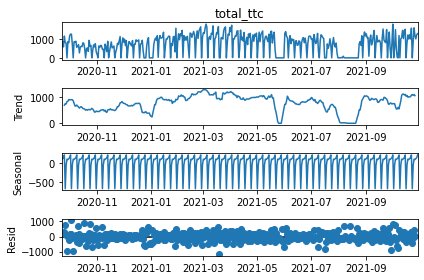

In [42]:
# Additive Decomposition (y = Trend + Seasonal + Residuals)
figure(figsize=(18, 6), dpi=80)

result_add = seasonal_decompose(result['total_ttc'], model='additive')
result_add.plot();


## Cannot handle sunday et holidays (zero days)

In [11]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)

#result_mul = seasonal_decompose(data['total_ttc'], model='multiplicative')
#result_mul.plot();

In [12]:
data_no_empty = data[data["Order"] != "0"]

In [43]:
#result_mul = seasonal_decompose(data_no_empty['total_ttc'], model='multiplicative')result_mul.plot();

## Adding day of week 

In [9]:
result['day_of_week0'] = result.index
result['day_of_week'] = result.day_of_week0.dt.dayofweek#.to_frame()
result = result.drop('day_of_week0', 1)
result.head(5)

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_55848/1443071808.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  result = result.drop('day_of_week0', 1)


,temperature,precipitation,maxwind,condition,total_ttc,Order,day_of_week
2020-09-22,22.5,14.4,5.0,Light rain shower,488.3,18.0,1
2020-09-23,22.1,10.8,10.4,Light rain shower,888.4,31.0,2
2020-09-24,19.5,11.1,13.0,Light rain shower,599.5,22.0,3
2020-09-25,13.3,5.0,23.8,Light rain shower,1184.2,45.0,4
2020-09-26,10.4,5.9,20.9,Light rain shower,833.1,28.0,5


In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(result[['day_of_week']]) # Fit encoder

dow_encoded = ohe.transform(result[['day_of_week']]) 
dow_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [11]:
result["lundi"],result["mardi"],result['mercredi'],result['jeudi'],result['vendredi'],result['samedi'],result['dimanche'] = dow_encoded.T 
result = result.drop('day_of_week', 1)

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_55848/1281879981.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  result = result.drop('day_of_week', 1)


In [12]:
result.shape


(403, 13)

In [13]:
result_no_0 = result[result["total_ttc"] != 0]
result_no_0.shape

(317, 13)

# Datas for model

In [14]:
X = result.drop(['condition','total_ttc','Order'],1)
X



/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_55848/739980031.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = result.drop(['condition','total_ttc','Order'],1)


,temperature,precipitation,maxwind,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
2020-09-22,22.5,14.4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-09-23,22.1,10.8,10.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-09-24,19.5,11.1,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-09-25,13.3,5.0,23.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-09-26,10.4,5.9,20.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,13.2,0.0,7.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-26,13.5,0.0,14.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-10-27,13.4,0.0,5.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2021-10-28,13.4,0.0,11.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
y1 = result.total_ttc
y2 = result.Order

## Split 30% test

In [16]:
X_train = X[:"2021-07-01"]
X_train.shape

(283, 10)

In [17]:
X_test = X["2021-07-01":]
X_test.shape

(121, 10)

In [18]:
y2_train = y2[:"2021-07-01"]
y2_train.shape

(283,)

In [19]:
y2_test = y2["2021-07-01":]
y2_test.shape

(121,)

## Régression linéaire basique

In [20]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [21]:
model = LinearRegression()
model = model.fit(X_train, y2_train)

In [22]:
print(model.coef_)
print(model.intercept_)
print(model.score(X_test,y2_test))

[  0.03385785   0.10038268   0.15240747   3.00125296   6.09750974
   7.61999712   8.00973635   8.50038692 -29.79156571  -3.43731738]
31.362774787331958
0.23199892136727762


<AxesSubplot:>

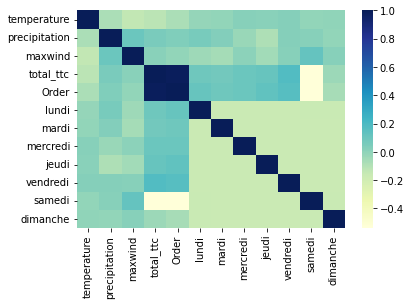

In [23]:
import seaborn as sns

# Heatmap
corr = result.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")


In [25]:
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_train, y2_train, cv=10)

scores.mean()


-0.13340789647769843

### Scaling

In [26]:
from sklearn.preprocessing import RobustScaler

In [27]:
X_train

,temperature,precipitation,maxwind,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
2020-09-22,22.5,14.4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-09-23,22.1,10.8,10.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-09-24,19.5,11.1,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-09-25,13.3,5.0,23.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-09-26,10.4,5.9,20.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-27,23.9,1.3,13.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-06-28,24.5,1.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-29,20.9,3.0,11.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-06-30,20.0,0.3,5.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
scaler = RobustScaler()
scaler.fit(X_train[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']]) # Fit and learn params for scaling
X_train[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']] = scaler.transform(X_train[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']]) # Apply to training
X_train

#model = LinearRegression() 
#model.fit(X_train, y2_train) # Train model

X_test[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']] = scaler.transform(X_test[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']]) # Apply to training
#preds = model.predict(X_test)


/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Testing a dummy model 

In [29]:
from sklearn.dummy import DummyRegressor


In [30]:
baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y2_train) # Calculate value for stratgy
baseline_model.score(X_test, y2_test) 

-0.014286720761673699

### Testing a basic linear model

In [114]:
from sklearn.metrics import mean_squared_error

In [31]:
lin_reg2 = LinearRegression()

scores = cross_val_score(lin_reg2, X_test, y2_test, cv=10)

scores.mean()

-1480.4850257997664

In [32]:
model = LinearRegression()
model = model.fit(X_train, y2_train)

y_pred = model.predict(X_test)

In [33]:
y2_train

2020-09-22    18.0
2020-09-23    31.0
2020-09-24    22.0
2020-09-25    45.0
2020-09-26    28.0
              ... 
2021-06-27    36.0
2021-06-28    58.0
2021-06-29    53.0
2021-06-30    52.0
2021-07-01    46.0
Freq: D, Name: Order, Length: 283, dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

mse = mean_squared_error(y2_test, y_pred)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y2_test, y_pred)

rsquared = r2_score(y2_test, y_pred)

max_error = max_error(y2_test, y_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))


MSE = 501.09
RMSE = 22.39
MAE = 17.54
R2 = 0.23
Max Error = 43.96


In [35]:
X_test['y_pred'] = y_pred
X_test['y_true'] = y2_test
X_test.tail(50)

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_55848/4234350068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = y_pred
/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_55848/4234350068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_true'] = y2_test


,temperature,precipitation,maxwind,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche,y_pred,y_true
2021-09-10,1.215686,-0.073171,-0.670103,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41.632245,65.0
2021-09-11,1.477124,-0.121951,-0.556701,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.530267,0.0
2021-09-12,1.503268,-0.121951,-0.855670,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.458432,34.0
2021-09-13,1.725490,-0.121951,-0.670103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36.192413,56.0
2021-09-14,1.084967,0.268293,-0.484536,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.593241,41.0
2021-09-15,1.725490,0.024390,0.886598,0.0,0.0,1.0,0.0,0.0,0.0,0.0,43.099347,49.0
2021-09-16,1.254902,0.829268,-0.257732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.154144,45.0
2021-09-17,1.176471,-0.121951,-0.896907,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41.281933,38.0
2021-09-18,0.836601,0.707317,0.113402,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.706968,0.0
2021-09-19,0.379085,1.780488,-0.072165,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.148859,39.0


In [125]:
x = y2_test.index

Text(0, 0.5, 'predictions')

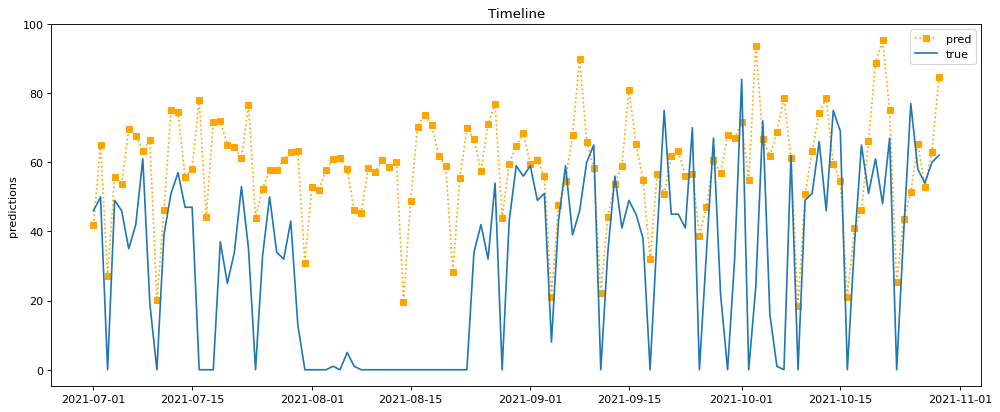

In [127]:
figure(figsize=(15, 6), dpi=80)
plt.plot(x,y_pred,label='pred', c="orange", ls=':', marker='s');
plt.plot(x,y2_test, label='true');
plt.legend()
plt.title('Timeline')
plt.ylabel('predictions')